<a href="https://colab.research.google.com/github/Imperial-College-Data-Science-Society/Lecture-series-2022-23/blob/main/Numpy_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction to Numpy**

Numpy is used for working with multi-dimensional arrays. Numpy uses "vectorisation" to make calculation much quicker and efficient.

In [1]:
#Importing Numpy
import numpy as np

Creating numpy arrays

In [2]:
arr = np.array([1,2,3,4,5])

In [3]:
arr

array([1, 2, 3, 4, 5])

Numpy has built in methods to initalise specific arrays with evenly spaced numbers over some given interval: 

*   **np.arange([start,] stop, [step, ])**: if start and step are not specified, they are assumed to be 0 and 1 respectively
*   **np.linspace(start, stop, num)**



In [4]:
arr = np.arange(5) #array[0,1,2,3,4]
arr = np.arange(10,15) #array [10,11,12,13,14]
arr = np.arange(0,10,2) #array[0,2,4,6,8]

**Creating Vectors and Matrices**

In [5]:
vector = np.zeros(4) #R4 Zero Vector
matrix = np.zeros([2,4]) #R2x4 Zero Matrix.
tensor = np.zeros([4,3,2]) #R4x3x2 tensor

In [6]:
tensor[1][2][1]

0.0

In [7]:
#The input must be in a list (unless it is a Vector) 
arr = np.zeros(2,4) #This will return an error!

TypeError: ignored

**Creating arrays with random numbers**

*   **np.random.rand(d0,d1,...,dn)**
*  **np.random.randn(d0,d1,...,dn)**
Both create an array of the given shape and populate with random samples

Rand: Unifrom Distribution over interval [0,1)

Randn: Standard Normal Distribution
Standard Normal Dist.svg
Credits: https://www.w3schools.com/statistics/statistics_standard_normal_distribution.php



In [8]:
arr = np.random.rand(3,4)

In [9]:
arr

array([[0.76599273, 0.61356878, 0.97246303, 0.56718518],
       [0.85249156, 0.96885637, 0.00599319, 0.34472531],
       [0.31190032, 0.11424322, 0.11159635, 0.60024227]])

In [10]:
arr = np.random.randn(3,4)

In [11]:
arr

array([[ 1.07945886, -1.39158772, -0.39888226,  1.07316546],
       [-1.31474278, -0.32102917,  0.32263058,  1.04290634],
       [ 0.38909177,  1.15635937,  0.06992027, -0.89274482]])

Other Methods: 

*   **np.identity(n)**: R nxn Identity Matrix
*   **np.eye(N)**: R NxN Diagonal Matrix



**Reshaping Arrays**

In [12]:
arr.shape

(3, 4)

In [13]:
arr.reshape((4,3))

array([[ 1.07945886, -1.39158772, -0.39888226],
       [ 1.07316546, -1.31474278, -0.32102917],
       [ 0.32263058,  1.04290634,  0.38909177],
       [ 1.15635937,  0.06992027, -0.89274482]])

When reshaping, numpy allows 1 dimension to be "-1." This means that it is an unknown dimension and lets numpy figure it out on its own. For example with a R3x4 matrix:

In [14]:
arr.reshape((3,-1))
#Numpy Automatically figured out that the -1 should be a 4. 
#As there are 12 elements but 3 was already specified

array([[ 1.07945886, -1.39158772, -0.39888226,  1.07316546],
       [-1.31474278, -0.32102917,  0.32263058,  1.04290634],
       [ 0.38909177,  1.15635937,  0.06992027, -0.89274482]])

**Slicing**

In [15]:
arr = np.arange(15) #[0,1,2,3,...,13,14]

In [16]:
#Reshape into a 3x5 matrix 
arr = arr.reshape((3,-1))

In [17]:
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [18]:
arr[0,:] #Get row 0
arr[:,0:2] #Get all rows in columns 0 to 1 (2 is exclusive)

array([[ 0,  1],
       [ 5,  6],
       [10, 11]])

**Boolean Indexing**

In [19]:
arr>5

array([[False, False, False, False, False],
       [False,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [20]:
arr[arr>5] #Return elements that satisfy the condition

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14])

**Matrix & Element-wise Multiplication**

In [21]:
arr = np.arange(4).reshape((2,2))
arr

array([[0, 1],
       [2, 3]])

In [22]:
arr*arr #Multiplies corresponding elements

array([[0, 1],
       [4, 9]])

In [23]:
np.dot(arr,arr) #Matrix Multiplication

array([[ 2,  3],
       [ 6, 11]])

**Broadcasting**
<br> "Subject to certain constraints, the smaller array is "broadcast" across the larger array so that they have compatible shapes"

<br> Say we want a new array with elements that are double the original array. For example: [1, 2, 3, 4] --> [2, 4, 6, 8]

In [24]:
[1,2,3,4] * 2

[1, 2, 3, 4, 1, 2, 3, 4]

In [25]:
[1,2,3,4] * [2,2,2,2] #This will return an error

TypeError: ignored

2 valid ways to double each element in a list (without NumPy) are:



In [26]:
[2*x for x in [1,2,3,4]] #Method 1: List Comprehension

[2, 4, 6, 8]

In [27]:
list(map(lambda x:x*2,[1,2,3,4])) #Method 2: map and lambda.......

[2, 4, 6, 8]

Why go through all this trouble when you have NumPy broadcasting?

In [28]:
np.array([1,2,3,4]) * 2 #NumPy "stretched" 2 to match the dimension of the array.

array([2, 4, 6, 8])

More examples in Broadcasting: The [[2],[3]] is "broadcast" into [[2,2,2,2],[3,3,3,3]]

In [29]:
np.array([[1,2,3,4],[5,6,7,8]]) * [[2],[3]] #Multiply first row by 2 and second row by 3

array([[ 2,  4,  6,  8],
       [15, 18, 21, 24]])

Instead of manually creating a new array/ list: [2, 2, 2, 2], numpy automatically "broadcast" the number 2 to be a numpy array with the appropriate shape.

**How efficient is numpy?**

Demonstration with matrix multiplication. For loop vs numpy (with timing)

In [30]:
import time #Package for timing

In [31]:
def matmul(matrix1_,matrix2_):
  """Function that returns matrix multiplication result using for loop method"""
  result = [] # final result
  for i in range(len(matrix1_)):
    row = [] # the new row in new matrix

    for j in range(len(matrix2_[0])):

      product = 0 # the new element in the new row

      for v in range(len(matrix1_[i])):
        product += matrix1_[i][v] * matrix2_[v][j]
        row.append(product) # append sum of product into the new row

      result.append(row) # append the new row into the final result
  return result

In [32]:
#Initialising arrays for multiplication
np.random.seed(42)
arr1 = np.random.randn(300,300)
arr2 = np.random.randn(300,50)

#Using for loops
start_for = time.perf_counter()
result_for = matmul(arr1,arr2)
end_for = time.perf_counter()
print(f'For loop took: {end_for-start_for:.5f} seconds')

#Using Numpy
start_np = time.perf_counter()
result_np = np.dot(arr1,arr2)
end_np = time.perf_counter()
print(f'Numpy took: {end_np-start_np:.5f} seconds')

For loop took: 2.24454 seconds
Numpy took: 0.00671 seconds


**Introduction to Pandas**

In [33]:
import pandas as pd

<br> Pandas is bulit on top of the NUMPY package. Hence many Numpy methods will be valid in pandas


<br> Pandas mainly used for working with data sets. Many built in functions help with preprocessing data for further use.The next lecture is about preprocessing data using real data!

*Core Components of Pandas*
<br> There are 2 main components of pandas: Series and DataFrame.

<br> Series are essentially numpy arrays (or is essentially a column in a table) while DataFrames are a collection of series.

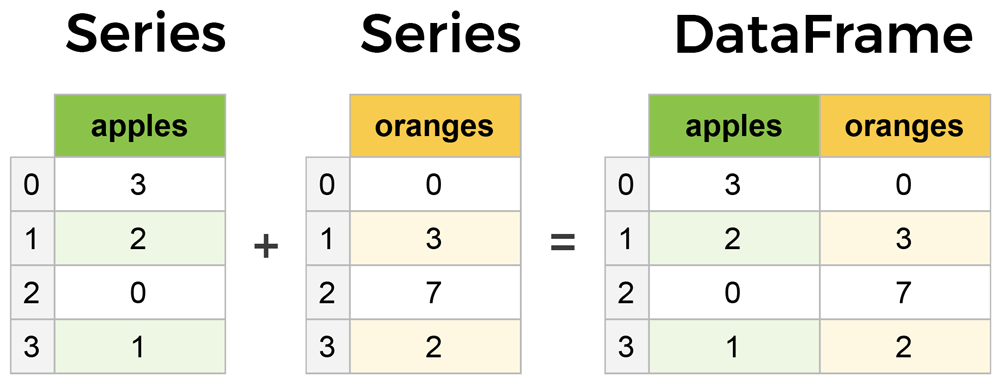
Credits: https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/

For datascience, most data will be in a CSV/ excel format. Pandas has a built in function for this

In [34]:
#This file is already available in COLAB
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [35]:
df.head() #Print the first 5 rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Note that each series must have elements of the same data type but not all series in a dataframe must have the same data type. For example, 1 column can be floats only while another consists of strings

In [36]:
df.describe() #Get statistics for each column

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [37]:
df['longitude'] #Display the "longitude" column of the dataframe. Returns a series

0       -114.31
1       -114.47
2       -114.56
3       -114.57
4       -114.57
          ...  
16995   -124.26
16996   -124.27
16997   -124.30
16998   -124.30
16999   -124.35
Name: longitude, Length: 17000, dtype: float64

In [38]:
df[['longitude','latitude']] #Display multiple columns. Returns a dataframe

,longitude,latitude
0,-114.31,34.19
1,-114.47,34.40
2,-114.56,33.69
3,-114.57,33.64
4,-114.57,33.57
...,...,...
16995,-124.26,40.58
16996,-124.27,40.69
16997,-124.30,41.84
16998,-124.30,41.80


**Boolean Indexing**
<br> Just like a numpy array, conditions can be used to slice a dataframe.

In [39]:
df['housing_median_age'] >37

0        False
1        False
2        False
3        False
4        False
         ...  
16995     True
16996    False
16997    False
16998    False
16999     True
Name: housing_median_age, Length: 17000, dtype: bool

In [40]:
df[df['housing_median_age']>37] #Returns all columns that satisfy the condition

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0
12,-114.61,34.84,48.0,1291.0,248.0,580.0,211.0,2.1571,48600.0
30,-115.38,32.82,38.0,1892.0,394.0,1175.0,374.0,1.9939,65800.0
52,-115.52,33.12,38.0,1327.0,262.0,784.0,231.0,1.8793,60800.0
...,...,...,...,...,...,...,...,...,...
16978,-124.18,40.79,39.0,1836.0,352.0,883.0,337.0,1.7450,70500.0
16992,-124.23,40.81,52.0,1112.0,209.0,544.0,172.0,3.3462,50800.0
16993,-124.23,40.54,52.0,2694.0,453.0,1152.0,435.0,3.0806,106700.0
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
